# Ejercicios utilizando rpy2

## Ejercicio 1: Cálculo estadístico básico en R desde Python
En este ejercicio, usaremos rpy2 para ejecutar una operación estadística básica en R, como la media y desviación estándar de un conjunto de datos.

In [2]:
pip install rpy2


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rpy2: filename=rpy2-3.5.16-py3-none-any.whl size=220714 sha256=9abbf034c7ccf6f530aa335d606dcb7f67d5ca283a4b57a178fd0671d5a5edc3
  Stored in directory: c:\users\gabriel.guzman\appdata\local\pip\cache\wheels\1b\7a\26\1d103e01b538d35ccbc2247a5b0f55fcf98a973d032a1282e5
Successfully built rpy2


In [3]:
import os
os.environ['R_HOME'] = 'C:/Prgrms/R/R441'
import rpy2.robjects as ro

In [4]:
# Definir un vector en R desde Python
r_code = """
  numbers <- c(5, 10, 15, 20, 25)
  mean_value <- mean(numbers)
  sd_value <- sd(numbers)
  list(mean=mean_value, sd=sd_value)
"""
# Ejecutar el código de R
result = ro.r(r_code)

In [5]:
# Imprimir el resultado en Python
print(f"Media: {result[0]} \nDesviación Estándar: {result[1]}")

Media: [1] 15
 
Desviación Estándar: [1] 7.905694



## Ejercicio 2: Visualización de datos con ggplot2 en R desde Python
En este ejercicio, crearás un gráfico básico utilizando la librería ggplot2 en R y lo generarás desde Python.

In [8]:
# Importar los módulos necesarios
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grdevices
from IPython.display import Image

# Importar ggplot2 en R
importr('ggplot2')

# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

# Definir código R para crear un gráfico
r_code = """
  library(ggplot2)
  
  # Crear un DataFrame simple
  df <- data.frame(x = c(1, 2, 3, 4, 5), y = c(2, 4, 6, 8, 10))
  
  # Crear el gráfico
  plot <- ggplot(df, aes(x=x, y=y)) +
          geom_line(color="blue", linewidth=1.5) +
          geom_point(color="red", size=3) +
          ggtitle("Gráfico Lineal en R") +
          xlab("Eje X") +
          ylab("Eje Y") +
          theme_minimal()
  
  # Devolver el gráfico
  print(plot)
"""

# Ejecutar el código de R para crear el gráfico
ro.r(r_code)

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()

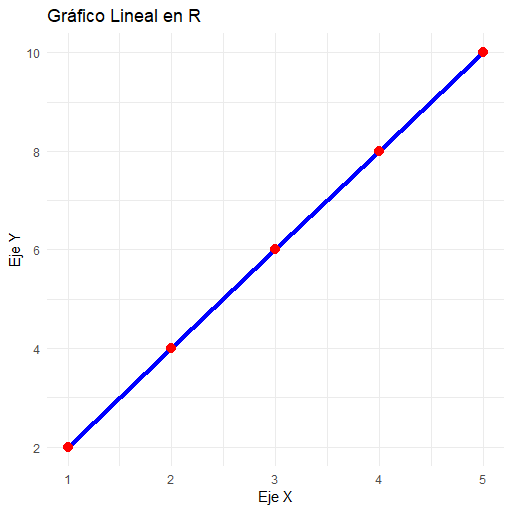

In [5]:
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

## Ejercicio 3: Modelo lineal simple en R desde Python
En este ejercicio, vas a entrenar un modelo lineal simple en R, usando una función de regresión y ejecutándolo desde Python.

In [9]:
import rpy2.robjects as ro

# Código de R para un modelo de regresión lineal
r_code = """
  data <- data.frame(
    x = c(1, 2, 3, 4, 5),
    y = c(2, 3, 5, 7, 11)
  )
  model <- lm(y ~ x, data = data)
  summary(model)
"""

# Ejecutar el código de R
result = ro.r(r_code)

In [10]:
# Mostrar el resultado del modelo en Python
print(result)


Call:
lm(formula = y ~ x, data = data)

Residuals:
   1    2    3    4    5 
 0.8 -0.4 -0.6 -0.8  1.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1.0000     1.0132  -0.987  0.39644   
x             2.2000     0.3055   7.201  0.00552 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9661 on 3 degrees of freedom
Multiple R-squared:  0.9453,	Adjusted R-squared:  0.9271 
F-statistic: 51.86 on 1 and 3 DF,  p-value: 0.00552


